# Startup Predictor

## Data Import and Cleaning

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [63]:
df = pd.read_csv('startup data.csv')
df.drop(['zip_code', 'id',  'object_id', 'name', 'Unnamed: 6','Unnamed: 0'], axis=1, inplace=True)
df

,state_code,latitude,longitude,city,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,San Diego,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,Los Gatos,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,San Diego,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,Cupertino,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,San Francisco,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,San Francisco,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,Burlington,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,...,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,Sunnyvale,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,...,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,San Francisco,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [64]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'city', 'labels', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [65]:
df.dtypes

state_code                   object
latitude                    float64
longitude                   float64
city                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise               

In [66]:
y = df[['status', 'is_top500']]
#we need to predict the status of the startup as a category, so encode it as a category
y['status'] = y['status'].astype('category')
y['status'] = y['status'].cat.codes
y

C:\Users\eamor\AppData\Local\Temp\ipykernel_29876\124556560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['status'] = y['status'].astype('category')
C:\Users\eamor\AppData\Local\Temp\ipykernel_29876\124556560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['status'] = y['status'].cat.codes


,status,is_top500
0,0,0
1,0,1
2,0,1
3,0,1
4,1,1
...,...,...
918,0,1
919,1,1
920,1,1
921,0,1


In [67]:
#we will drop the non-numeric columns
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna(axis=1)
df

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,42.358880,-71.056820,1,2.2493,3.0027,3,3,375000,3,1,...,0,1,0,1,0,0,0,0,1.0000,0
1,37.238916,-121.973718,1,5.1260,9.9973,9,4,40100000,1,1,...,0,0,1,0,0,1,1,1,4.7500,1
2,32.901049,-117.192656,1,1.0329,1.0329,5,1,2600000,2,1,...,0,0,0,0,1,0,0,0,4.0000,1
3,37.320309,-122.050040,1,3.1315,5.3151,5,3,40000000,1,1,...,0,0,0,0,0,1,1,1,3.3333,1
4,37.779281,-122.419236,0,0.0000,1.6685,2,2,1300000,1,1,...,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,1,0.5178,0.5178,9,1,1100000,2,1,...,0,0,0,0,1,0,0,0,6.0000,1
919,42.504817,-71.195611,0,7.2521,9.2274,1,3,52000000,1,0,...,0,1,1,0,0,1,0,0,2.6667,1
920,37.408261,-122.015920,0,8.4959,8.4959,5,1,44000000,1,1,...,0,0,0,0,0,0,0,1,8.0000,1
921,37.556732,-122.288378,1,0.7589,2.8329,12,2,15500000,2,1,...,0,0,0,0,1,1,0,0,1.0000,1


In [68]:
#train test split
from sklearn.model_selection import train_test_split
X = df
#y was defined above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training the model

In [76]:
#random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=12)
rfc.fit(X_train, y_train)

#predicting the test set results
y_pred = rfc.predict(X_test)

#making the confusion matrix, one for status and one for is_top500
from sklearn.metrics import confusion_matrix
cum_status = confusion_matrix(y_test['status'], y_pred[:,0])
cum_top500 = confusion_matrix(y_test['is_top500'], y_pred[:,1])

#get the report
from sklearn.metrics import classification_report
print(classification_report(y_test['status'], y_pred[:,0]))
print(classification_report(y_test['is_top500'], y_pred[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        67

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       142

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



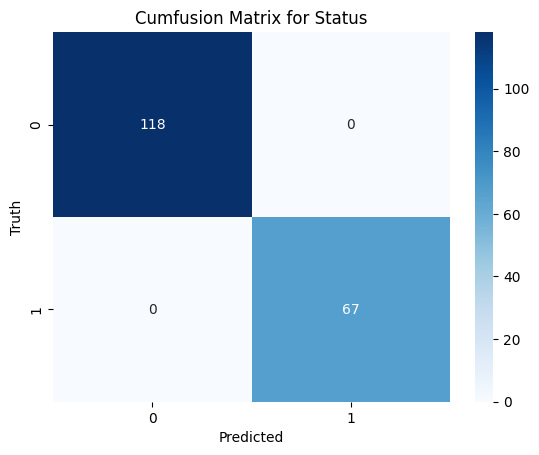

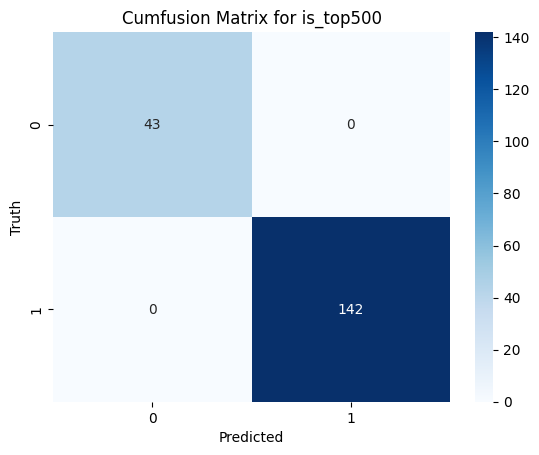

In [77]:
#use seaborn to plot the confusion matrix
import seaborn as sns
sns.heatmap(cum_status, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Cumfusion Matrix for Status')
plt.show()

sns.heatmap(cum_top500, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Cumfusion Matrix for is_top500')
plt.show()


In [ ]:

#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
